In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4'], dtype='object')

In [4]:
df_min=df[df['4']==1]

In [5]:
df_min.to_csv('iris0_minority_train.csv',index=False)
df_min=pd.read_csv('iris0_minority_train.csv')

In [6]:
df_majority=df[df['4']==0]
df_majority.to_csv('iris0_majority_train.csv',index=False)
df_majority=pd.read_csv('iris0_majority_train.csv')

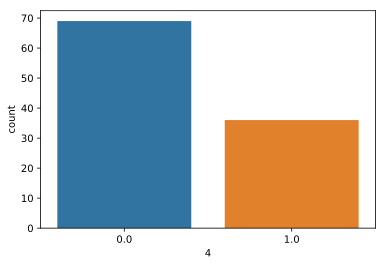

In [7]:
%matplotlib inline
sns.countplot(x='4',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(30, 5, 5)
(30, 5)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(5))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
Total params: 2,185
Trainable params: 2,185
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
18/18 [==============================] - 3s 167ms/step - loss: 0.2603
Epoch 2/500
18/18 [==============================] - 0s 891us/step - loss: 0.2549
Epoch 3/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2488
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2425
Epoch 5/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2360
Epoch 6/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2296
Epoch 7/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2232
Epoch 8/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2168
Epoch 9/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2105
Epoch 10/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2043
Epoch 11/500
18/18 [==============================] - 0s 2ms/step - loss: 0.1982
Epoch 12/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1922
Epoch 13/500
18/18 [=============

18/18 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 103/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 104/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 105/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 106/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0319
Epoch 107/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 108/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0318
Epoch 109/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 110/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0318
Epoch 111/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0318
Epoch 112/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0318
Epoch 113/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 114/500
18/18 [=========

18/18 [==============================] - 0s 1ms/step - loss: 0.0307
Epoch 203/500
18/18 [==============================] - 0s 975us/step - loss: 0.0307
Epoch 204/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0307
Epoch 205/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0306
Epoch 206/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0306
Epoch 207/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 208/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0306
Epoch 209/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0306
Epoch 210/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0306
Epoch 211/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0306
Epoch 212/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 213/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0305
Epoch 214/500
18/18 [=======

18/18 [==============================] - 0s 1ms/step - loss: 0.0292
Epoch 303/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0292
Epoch 304/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0292
Epoch 305/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0292
Epoch 306/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 307/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 308/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 309/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 310/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 311/500
18/18 [==============================] - 0s 7ms/step - loss: 0.0291
Epoch 312/500
18/18 [==============================] - 0s 5ms/step - loss: 0.0290
Epoch 313/500
18/18 [==============================] - 0s 6ms/step - loss: 0.0290
Epoch 314/500
18/18 [=========

18/18 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 403/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 404/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 405/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 406/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 407/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0271
Epoch 408/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0271
Epoch 409/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 410/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 411/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 412/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 413/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 414/500
18/18 [=========

In [14]:
model.save('7-24-2019-iris0-v1.h5')

In [15]:
Xtrain.shape

(18, 5, 5)

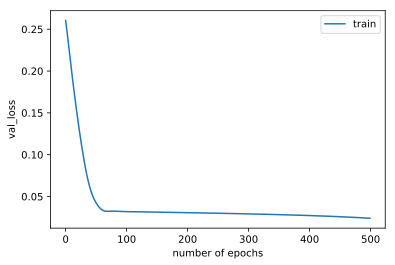

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

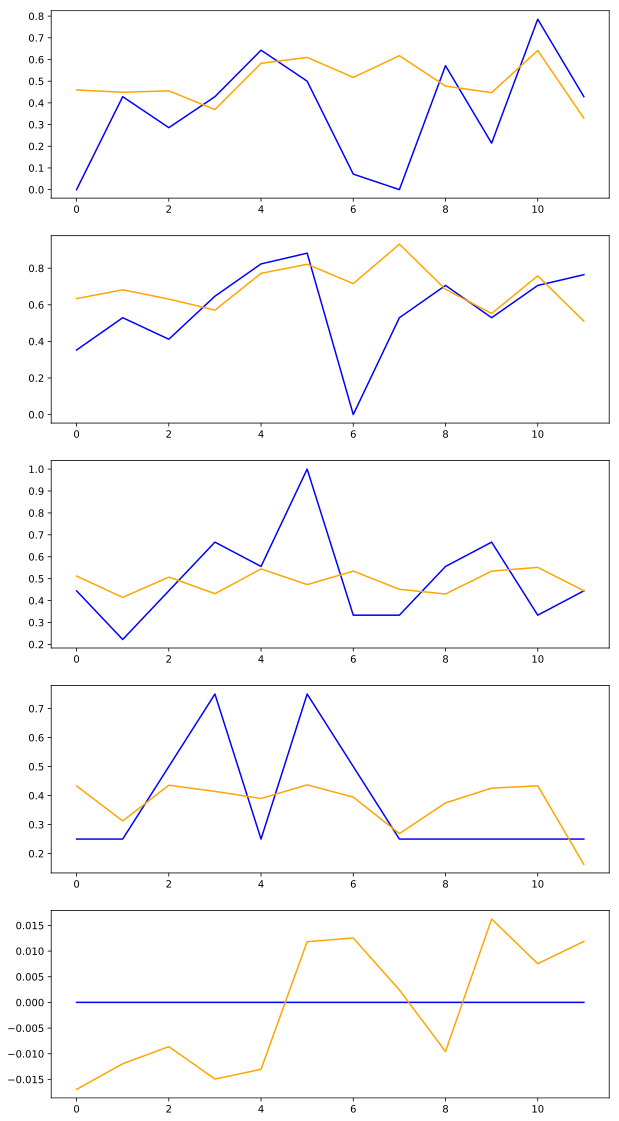

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 0.45941013,  0.6341205 ,  0.5118963 ,  0.43299884, -0.0169504 ],
       [ 0.44907105,  0.6820768 ,  0.4143928 ,  0.3124483 , -0.01195078],
       [ 0.45535368,  0.6310622 ,  0.5073279 ,  0.43563476, -0.00862177],
       [ 0.36912432,  0.57085776,  0.43130064,  0.4143505 , -0.01493431],
       [ 0.58248866,  0.77208793,  0.54449004,  0.3897466 , -0.01303382],
       [ 0.60970753,  0.8216339 ,  0.47287247,  0.43687922,  0.01182651],
       [ 0.51732665,  0.7157124 ,  0.53441596,  0.39457282,  0.01254242],
       [ 0.6175603 ,  0.9314738 ,  0.45131844,  0.26890728,  0.00241039],
       [ 0.47727972,  0.68451893,  0.4299721 ,  0.37470478, -0.00958331],
       [ 0.44692934,  0.55235755,  0.5343892 ,  0.4256927 ,  0.0162479 ],
       [ 0.6415918 ,  0.75835073,  0.55148196,  0.43358907,  0.00753519],
       [ 0.32935435,  0.51045483,  0.44486544,  0.16247474,  0.01188866]],
      dtype=float32)

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

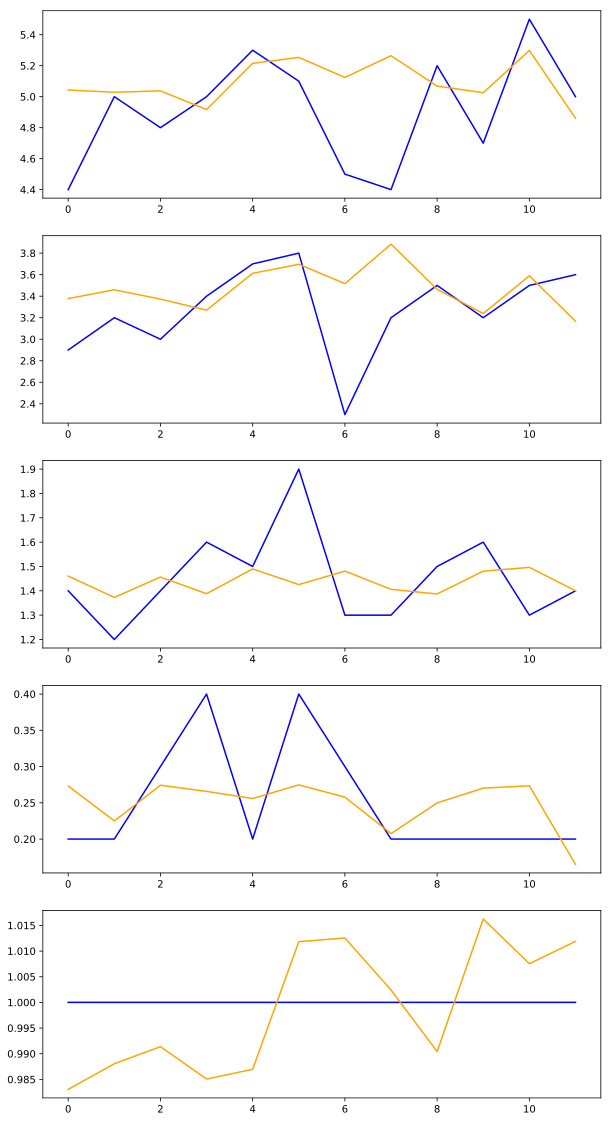

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 0.45941013,  0.6341205 ,  0.5118963 ,  0.43299884, -0.0169504 ],
       [ 0.44907105,  0.6820768 ,  0.4143928 ,  0.3124483 , -0.01195078],
       [ 0.45535368,  0.6310622 ,  0.5073279 ,  0.43563476, -0.00862177],
       [ 0.36912432,  0.57085776,  0.43130064,  0.4143505 , -0.01493431],
       [ 0.58248866,  0.77208793,  0.54449004,  0.3897466 , -0.01303382],
       [ 0.60970753,  0.8216339 ,  0.47287247,  0.43687922,  0.01182651],
       [ 0.51732665,  0.7157124 ,  0.53441596,  0.39457282,  0.01254242],
       [ 0.6175603 ,  0.9314738 ,  0.45131844,  0.26890728,  0.00241039],
       [ 0.47727972,  0.68451893,  0.4299721 ,  0.37470478, -0.00958331],
       [ 0.44692934,  0.55235755,  0.5343892 ,  0.4256927 ,  0.0162479 ],
       [ 0.6415918 ,  0.75835073,  0.55148196,  0.43358907,  0.00753519],
       [ 0.32935435,  0.51045483,  0.44486544,  0.16247474,  0.01188866]],
      dtype=float32)

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)